<a href="https://colab.research.google.com/github/nonanne/Image-Captioning/blob/main/DeepLearning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use the Flickr8k dataset. This is a dataset of 8,000 pairs of image-captions.


We will use Karpathy’s split.
Each image in this split has the following entries:
• sentences: the ground-truth sentences. Since an image can be described in various ways
by different people, each image is paired with multiple ground-truth sentences. Most images
have 5 captions. split: to which split (training, validation or testing) does the image belong to
• filename: the name of the image

In [10]:
import kagglehub
import json
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import json
import os

In [11]:
# dataset of 8000 paird of image-captions
path = kagglehub.dataset_download("adityajn105/flickr8k")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'flickr8k' dataset.
Path to dataset files: /kaggle/input/flickr8k


Each image in this split has the following entries:

• sentences: the ground-truth sentences. Since an image can be described in various ways
by different people, each image is paired with multiple ground-truth sentences. Most images
have 5 captions. You should train your model on at least 3 captions per image (the more
the better). If you choose to use 3, this will triple the number of training samples

• split: to which split (training, validation or testing) does the image belong to

• filename: the name of the image

**code for Imagenette cannot be used for Flickr8k**
1. datasets.Imagenette is a Dataset class made specifically for Imagenette
PyTorch only provides built-in dataset classes for a few datasets such as
datasets.Imagenette, datasets.CIFAR10, and datasets.MNIST.
There is no built-in Dataset class for Flickr8k.
→ Flickr8k requires creating your own custom Dataset class.
2. Flickr8k requires manually pairing each image with its captions
Using your JSON file (flickr8k_simplified.json), you must manually create a list like:
[filename, caption].
Imagenette automatically handles labels internally, but Flickr8k does not, so you must implement this yourself.

In [17]:
file_path = 'flickr8k_simplified.json'

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        json_data = json.load(f)
    print(f"Success: read {file_path} . number of data: {len(json_data)}")

except FileNotFoundError:
    # if it cant fine file
    print(f"Error: no {file_path} .")

    json_data = []

list_train = []

for item in json_data:
  if item["split"] == "train":
    filenames = item['filename']
    sentences = item['sentences']
    for sentence in sentences:
      list_train.append([filenames, sentence])

#confirm
print(f"--- result ---")
print(f"the number of images: {len([x for x in json_data if x.get('split') == 'train'])}")
print(f"the number of generated data: {len(list_train)}")

print("\n--- first 5 data ---")
# split 5 sentenses to each sentences with the same file name.
for sample in list_train[:5]:
    print(sample)

成功: flickr8k_simplified.json を読み込みました。データ数: 8000
--- result ---
the number of images: 6000
the number of generated data: 30000

--- first 5 data ---
['2513260012_03d33305cf.jpg', 'a black dog is running after a white dog in the snow .']
['2513260012_03d33305cf.jpg', 'black dog chasing brown dog through snow']
['2513260012_03d33305cf.jpg', 'two dogs chase each other across the snowy ground .']
['2513260012_03d33305cf.jpg', 'two dogs play together in the snow .']
['2513260012_03d33305cf.jpg', 'two dogs running through a low lying body of water .']


In [16]:
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image
import os

# read images -> resize to 224 224 -> tensor -> return set with caption

transform = transforms.Compose([
    transforms.Resize((224, 224)),   #for ViT
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

class FlickrDataset(Dataset):
    def __init__(self, list_data, image_root, transform=None):
        self.data = list_data          # [[filename, caption], ...]
        self.image_root = image_root   # 'Flickr8k/Images/'
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        filename, caption = self.data[idx]

        # image path
        img_path = os.path.join(self.image_root, filename)
        image = Image.open(img_path).convert('RGB')

        # Resize + Normalize
        if self.transform:
            image = self.transform(image)

        return image, caption

train_dataset = FlickrDataset(
    list_train,
    image_root=os.path.join(path, "Images"),
    transform=transform
)

train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True
)

image, caption = train_dataset[0]

print("Image tensor shape:", image.shape)


Image tensor shape: torch.Size([3, 224, 224])


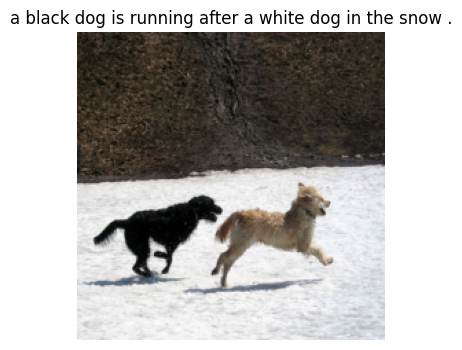

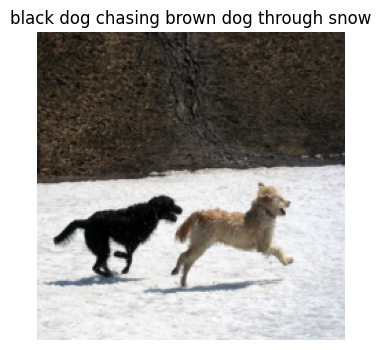

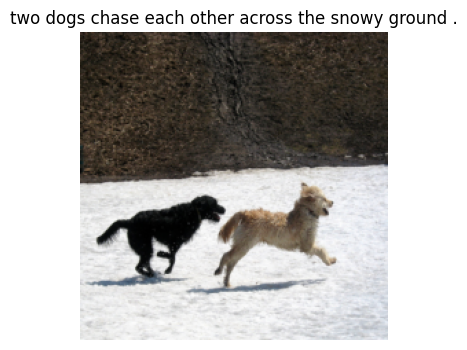

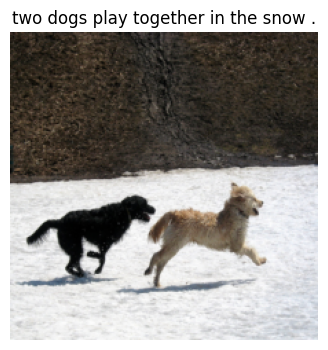

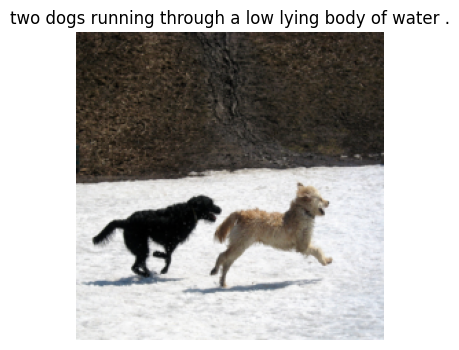

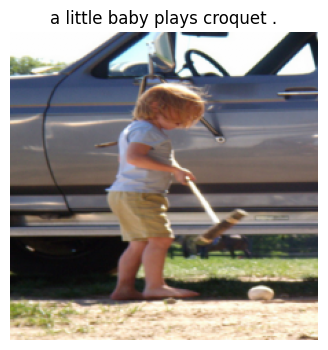

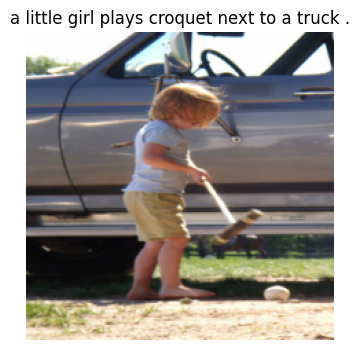

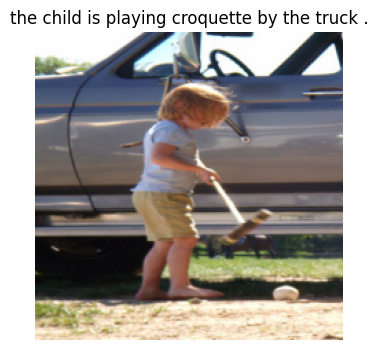

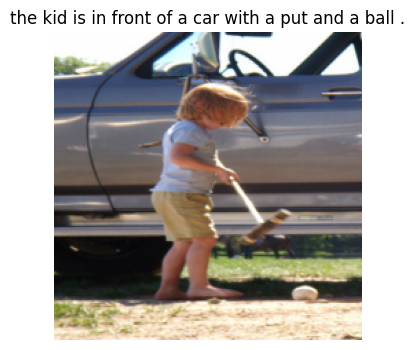

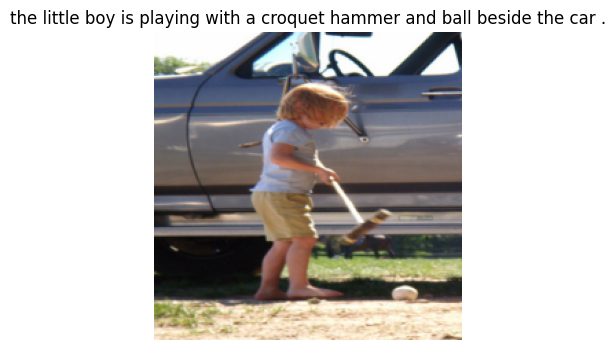

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 5 枚だけ取り出す
for i in range(10):
    image, caption = train_dataset[i]

    # Tensor → NumPy → 0-1 の範囲に戻す
    img_np = image.permute(1, 2, 0).numpy()        # CHW → HWC
    img_np = (img_np * 0.5) + 0.5                  # Normalize の逆変換

    plt.figure(figsize=(4, 4))
    plt.imshow(img_np)
    plt.axis("off")
    plt.title(caption)
    plt.show()
